In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Given p-values from the hypothesis tests
p_values = np.array([0.001, 0.008, 0.039, 0.041, 0.042, 0.06])
alpha = 0.05
n_tests = len(p_values)

# Step 1: Order p-values in ascending order
ordered_p_values = np.sort(p_values)

# Step 2: Compute adjusted significance levels (alpha_i)
adjusted_alpha = [alpha / (n_tests - i) for i in range(n_tests)]

# Step 3: Compare each ordered p-value to its adjusted alpha
reject_null = ordered_p_values < adjusted_alpha

# Step 4: Determine where we stop rejecting null hypotheses
# Bonferroni-Holm stops at the first non-rejection
for i, reject in enumerate(reject_null):
    if not reject:
        break
significant_tests = i  # Number of significant tests

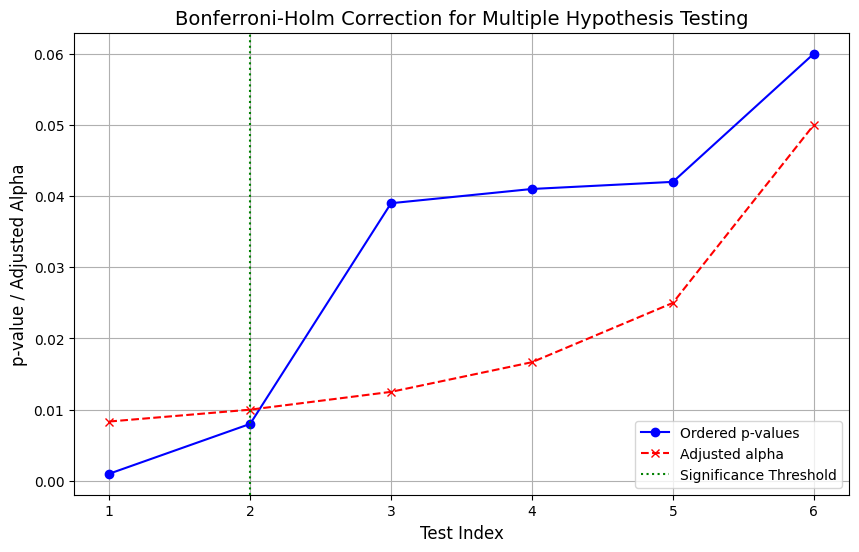

In [3]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ordered p-values
ax.plot(np.arange(1, n_tests + 1), ordered_p_values, marker='o', label='Ordered p-values', color='blue')

# Plot the adjusted significance levels
ax.plot(np.arange(1, n_tests + 1), adjusted_alpha, marker='x', linestyle='--', label='Adjusted alpha', color='red')

# Mark significant results
ax.axvline(x=significant_tests, color='green', linestyle=':', label='Significance Threshold')

# Annotations and aesthetics
ax.set_title('Bonferroni-Holm Correction for Multiple Hypothesis Testing', fontsize=14)
ax.set_xlabel('Test Index', fontsize=12)
ax.set_ylabel('p-value / Adjusted Alpha', fontsize=12)
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

In [4]:
# Analysis Results
analysis_results = []
for i, p_val in enumerate(ordered_p_values):
    result = f"Test {i+1}: p-value = {p_val}, adjusted alpha = {adjusted_alpha[i]:.5f}, {'Reject H0' if reject_null[i] else 'Fail to Reject H0'}"
    analysis_results.append(result)

analysis_summary = (f"\nConclusion: Reject the null hypothesis for the first {significant_tests} tests."
                    if significant_tests > 0 else
                    "\nConclusion: None of the tests are significant at the 0.05 level using Bonferroni-Holm correction.")

analysis_results.append(analysis_summary)

# Display the analysis results
print(analysis_results)

['Test 1: p-value = 0.001, adjusted alpha = 0.00833, Reject H0', 'Test 2: p-value = 0.008, adjusted alpha = 0.01000, Reject H0', 'Test 3: p-value = 0.039, adjusted alpha = 0.01250, Fail to Reject H0', 'Test 4: p-value = 0.041, adjusted alpha = 0.01667, Fail to Reject H0', 'Test 5: p-value = 0.042, adjusted alpha = 0.02500, Fail to Reject H0', 'Test 6: p-value = 0.06, adjusted alpha = 0.05000, Fail to Reject H0', '\nConclusion: Reject the null hypothesis for the first 2 tests.']
